In [5]:
import torchxrayvision as xrv

In [6]:
d = xrv.datasets.COVID19_Dataset(imgpath="covid-chestxray-dataset/images/",csvpath="covid-chestxray-dataset/metadata.csv")

In [7]:
import matplotlib.pyplot as plt

In [8]:
sample = d[6]

In [9]:
len(d)

535

In [10]:
len(d.pathologies)

25

In [11]:
# [len(d[i]["img"]) for i in range(len(d))]

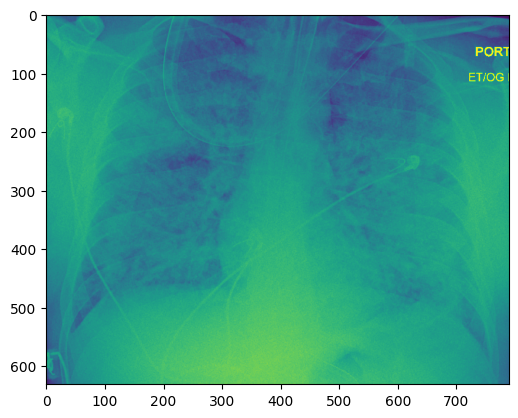

In [12]:
plt.imshow(sample["img"][0]);

In [13]:
sample["lab"]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
import pandas as pd
pd.Series(dict(zip(d.pathologies,sample["lab"])))

Aspergillosis     0.0
Aspiration        0.0
Bacterial         0.0
COVID-19          0.0
Chlamydophila     0.0
Fungal            0.0
H1N1              0.0
Herpes            0.0
Influenza         0.0
Klebsiella        0.0
Legionella        0.0
Lipoid            0.0
MERS-CoV          0.0
MRSA              0.0
Mycoplasma        0.0
No Finding        0.0
Nocardia          0.0
Pneumocystis      0.0
Pneumonia         1.0
SARS              0.0
Staphylococcus    0.0
Streptococcus     0.0
Tuberculosis      0.0
Varicella         0.0
Viral             0.0
dtype: float32

In [18]:
import numpy as np
print(np.max(sample["img"][0]))

1024.0


In [ ]:
print(sample["img"][0].shape)

In [12]:
# full details about the image is available in the pandas csv
d.csv.iloc[0]

index                                                                     0
patientid                                                                 2
offset                                                                  0.0
sex                                                                       M
age                                                                    65.0
finding                                            Pneumonia/Viral/COVID-19
RT_PCR_positive                                                           Y
survival                                                                  Y
intubated                                                                 N
intubation_present                                                        N
went_icu                                                                  N
in_icu                                                                    N
needed_supplemental_O2                                                    Y
extubated   

In [34]:
import numpy as np
df = pd.read_csv('new_data.csv',index_col=0)


In [35]:
Nmax = 9
alphas = [1.5]
columns = []
for a in alphas:
    for n in range(Nmax):
        for m in range(Nmax):
            columns.append("FrEM_"+str(a)+"_"+str(n)+"_"+str(m))
columns.append('COVID')

In [36]:
dff = pd.DataFrame(columns= columns)

In [38]:
for col in dff.columns[:-1]:
    dff[col]=np.abs(df[col+'_Re']+1j*df[col+'_Im'])
dff['COVID']=df['COVID']

In [39]:
dff

,FrEM_1.5_0_0,FrEM_1.5_0_1,FrEM_1.5_0_2,FrEM_1.5_0_3,FrEM_1.5_0_4,FrEM_1.5_0_5,FrEM_1.5_0_6,FrEM_1.5_0_7,FrEM_1.5_0_8,FrEM_1.5_1_0,...,FrEM_1.5_8_0,FrEM_1.5_8_1,FrEM_1.5_8_2,FrEM_1.5_8_3,FrEM_1.5_8_4,FrEM_1.5_8_5,FrEM_1.5_8_6,FrEM_1.5_8_7,FrEM_1.5_8_8,COVID
0,100.994183,63.500354,23.764615,14.809006,10.132739,6.458623,6.079418,8.116356,6.566475,24.248562,...,2.626713,0.579372,0.493647,0.304215,0.524688,0.741711,0.647763,0.501151,0.800689,1.0
1,155.623148,56.797151,13.028535,6.626909,18.327383,21.185920,12.829356,8.488317,2.170785,28.747849,...,2.719659,0.752805,1.146061,0.545097,0.778240,0.335614,0.345323,0.875008,1.023703,1.0
2,129.221184,78.454162,35.385913,14.856545,22.996153,26.209789,3.273651,8.038485,13.874770,33.070410,...,2.618402,1.192939,1.087911,0.424599,0.430478,0.243887,1.101742,0.878708,0.708836,1.0
3,90.390971,52.613964,27.395924,19.762264,25.765934,19.968011,7.511855,17.745597,2.505243,34.382638,...,2.952575,1.119850,1.417656,1.717594,0.808168,0.905884,1.340841,0.749654,1.203081,1.0
4,20.972250,64.084754,9.752420,19.138170,7.501705,13.622549,5.201777,2.111775,3.481266,30.666826,...,2.827844,0.086999,0.472183,0.830620,0.773404,0.326004,0.659731,0.117143,0.404780,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,6.883127,75.264972,37.513623,3.360013,10.654520,49.700737,11.437420,5.577192,5.947142,21.614034,...,3.719056,0.876259,0.242514,0.708348,1.493365,0.884711,0.928730,0.120899,0.389623,1.0
159,6.130279,64.330357,41.198263,19.205122,21.965439,48.871614,6.544300,9.683875,5.499273,40.247950,...,3.263427,0.199190,1.144857,0.809338,1.104481,0.597626,0.689203,1.347732,1.088185,1.0
160,35.419916,48.890970,21.477339,15.127299,15.477263,22.964934,20.840057,11.159461,8.346220,19.458437,...,2.461005,0.641289,0.667741,0.294197,0.453574,0.765203,0.744904,0.553106,0.501509,1.0
161,92.766527,78.600015,6.381894,37.157894,6.636164,24.621536,23.325773,8.346363,4.789105,21.415190,...,2.478435,1.090052,1.412673,1.000815,1.118920,0.172935,0.991784,0.885456,0.506042,1.0


In [40]:
import os
dff.to_csv('abs_data.csv', mode='a',index=True, header=not os.path.exists('abs_data.csv'))

In [17]:
#df[df.columns[:-1]]=df[df.columns[:-1]].apply(np.complex_)